In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
c   = 2.9979245800e+10 # Speed of light in CGS, in SI e-11
G   = 6.6741840000e-08 # Gravitational constant in CGS, in SI e-11
h   = 1.0545718000e-27 # Planck constant with dash in CGS, in SI e-34
m_p = 1.6726218980e-24 # Proton mass in CGS, in SI e-27
m_e = 9.1093835600e-28 # Electron mass in CGS, in SI e-31



In [3]:
def solver(solver_step, t_start, y_start, funcs, dt=1e-2):
    t = t_start
    y = y_start.copy()
    res = [] #y
    #print('Start solve by: ', solver_step.__name__)
    while y[1] >= 0.0 and all(np.isfinite(y)):
        res.append(y)
        y = solver_step(dt, t, y, funcs)
        
        
        t = t + dt
        
        #print('.', end='')
    #print('Solved')
    return t, np.array(res)

def euler_koshi_step(dt, t, y, funcs):
    y1 = np.zeros(len(funcs))
    ny = np.zeros(len(funcs))
    for (i, f) in enumerate(funcs):
        y1[i] = y[i] + dt * f(t, y)
    
    for (i, f) in enumerate(funcs):
        ny[i] = y[i] + dt * (f(t, y) + f(t + dt, y1)) / 2.0
    
    return ny

def rk_4_step(dt, t, y, funcs):
    sz = len(funcs)
    ny = np.zeros((sz,), dtype=np.float64)#[None] * sz
    
    two = float(2.0)
    
    k1 = np.array([dt * f(t, y) for f in funcs], dtype=np.float64)
    y1 = y + k1 / two #np.array([(y[i] + k1[i] / 2.0) for i in range(sz) ])
    #print(y1, (y + k1 / 2.0))
    t1 = (t + dt / two)
    
    k2 = np.array([dt * f(t1, y1) for f in funcs], dtype=np.float64)
    y2 = y + k2 / two #[(y[i] + k2[i] / two) for i in range(sz) ] #
    t2 = t1
    
    k3 = np.array([dt * f(t2, y2) for f in funcs], dtype=np.float64)
    y3 = y + k3 #[(y[i] + k3[i]) for i in range(sz) ]
    t3 = (t + dt)
    
    k4 = np.array([dt * f(t3, y3) for f in funcs], dtype=np.float64)
    
    for (i, f) in enumerate(funcs):
        ny[i] = y[i] + ( k1[i] + k4[i] + two * (k2[i] + k3[i]) ) / float(6.0)
    return ny

<h1>White Dwarf</h1>

0.04776886922879861
1.0193483114225477
[3.70370370e-08 1.01933171e+00]
1.0193317054901345
1.0191656475215005
1.0192579091001948
1.0143418147193757
1.0170706019165376
1.015250201111541
1.015038614116035
1.010400245707357
1.011764079414247
1.0083066938663476
1.0079083456757563
1.0023616795219588
1.0032352664147905
0.9981781186944672
0.9976959576552988
0.9909299476193562
0.9915616635518489
0.9849582983288054
0.9844411450126703
0.9763770633137083
0.9768634517560317
0.9687828152376547
0.9682589163718752
0.9589036993383354
0.9592920753539492
0.9498171590229924
0.949305197240071
0.9387087800999627
0.9390259350075117
0.928252143416563
0.9277654821266705
0.916003912373617
0.9162666064100261
0.9042999213210957
0.9038484889879168
0.8910153998216356
0.8912349241818067
0.8781899271763894
0.8777811536734786
0.8639824877863398
0.8641669019016432
0.8501647159341029
0.8498040491624714
0.8351542392060487
0.835309568891135
0.8204757774564935
0.8201670024224671
0.8047859024267515
0.8049168258662727
0.7893

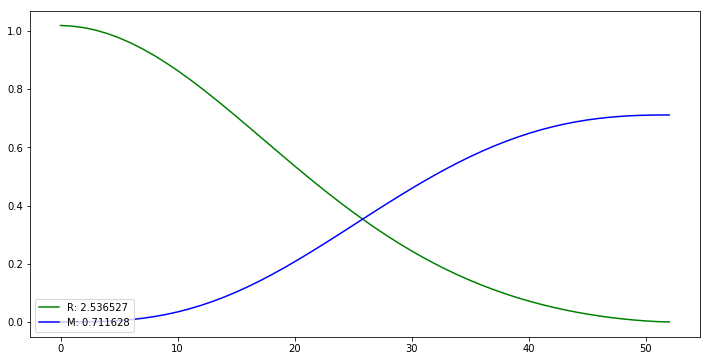

In [6]:
def psi(p):
    print(p)
    if p <= 0.0 or not np.isfinite(p):
        print("Here")
        return np.inf
    x = np.power(p, 2.0/float(3.0), dtype=np.float64)
    if not np.isfinite(x):
        print("Here")
        return np.inf
    #x2 = np.power(x, 2)
    return x / 3.0 / np.sqrt(1 + x)

funcs = [
    lambda r, y: y[1] * r**2, # dm/dr = p * r^2
    lambda r, y: -y[0] * y[1] / r**2 / psi(y[1]), # dp/dr = -m * p / psi / r^2
]

n0 = ((m_e*c/h) ** 3) / (3*(np.pi ** 2)) # Does not depend on anything
betta = 1#26.0/56.0
po0 = m_p*n0/betta

Pc = 1e6

Pc = Pc / float(po0)

dr = 1.0/float(3.0) * np.power(3e-3 / float(Pc), 1.0/float(3.0))

#dr = 0.33333*((0.003/Pc) ** 0.333333)#0.001
print(dr)

r0 = dr / float(10.0)

P0 = Pc - 1.0/float(6.0) * np.power(Pc * r0, 2) / psi(Pc)

m0 = Pc/float(3.0) * np.power(r0, 3)

y0 = np.array([m0, P0], dtype=np.float64)

print(y0)

R_rk4, result_rk4 = solver(rk_4_step, r0, y0, funcs=funcs, dt=dr)

R_euler, result_ek = solver(euler_koshi_step, r0, y0, funcs=funcs, dt=dr)

#print(np.array(result_rk4) - np.array(result_ek[:-1]))
#print(result_ek, "\n\n", result_rk4)

print(R_rk4)

plt.figure(figsize=(12, 6))
plt.plot(range(len(result_rk4[:,1])), result_rk4[:,1], color='green', label='R: {:f}'.format(R_rk4))
plt.plot(range(len(result_rk4[:,0])), result_rk4[:,0], color='blue', label='M: {:f}'.format(result_rk4[-1,0]))
#plt.xscale('log')
#plt.plot(result_ek[:,0], result_ek[:,1], color='orange', label='P/m euler: {:f}'.format(R_euler))

#plt.plot(rk4_res_x, rk4_res_y, color='green', label='rk_4_step')
plt.legend(loc="lower left")
plt.show()


In [82]:
def compute_dwarfs(dimensionless_center_density_array):
    
    radius_array = []
    mass_array = []
    density_array = []
    
    for Pc in dimensionless_center_density_array:
        
        dr = 1.0/float(3.0) * np.power(3e-3 / float(Pc), 1.0/float(3.0))
        r0 = dr / float(10.0)

        m_r0 = Pc/float(3.0) * np.power(r0, 3)
        po_r0 = Pc - 1.0/float(6.0) * np.power(Pc * r0, 2) / psi(Pc)
        y0 = np.array([m_r0, po_r0], dtype=np.float64)

        R_rk4, result_rk4 = solver(rk_4_step, r0, y0, funcs=funcs, dt=dr)

        m = result_rk4[-1,0]
        po = result_rk4[-1,1]
        
        #R_rk4 = r0 + dr * len(result_rk4[:,0])
        
        #R_rk4 = r0 + np.arange(len(result_rk4[:,0]))*dr
        
        radius_array.append(R_rk4)
        mass_array.append(m)
        density_array.append(po)
    
    return radius_array, mass_array, density_array

In [83]:
dimensionless_center_density_array = 1e-4*np.exp(np.arange(60)*0.6931471806) #/ float(po0)

radius_array, mass_array, density_array = compute_dwarfs(dimensionless_center_density_array)

po = dimensionless_center_density_array
m = np.array(mass_array)
r = np.array(radius_array)#[::-1]

print("Min parameter: {}, Max parameter: {}".format(np.min(po), np.max(po)))
print("Min radius: {}, Max raduis: {}".format(np.min(r), np.max(r)))
print("Min mass: {}, Max mass: {}".format(np.min(m), np.max(m)))

Min parameter: 0.0001, Max parameter: 57646075366573.05
Min radius: 0.0001780883658758663, Max raduis: 12.532504440680562
Min mass: 0.009553040697260656, Max mass: 2.0182376988505903


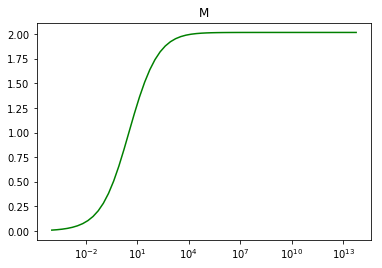

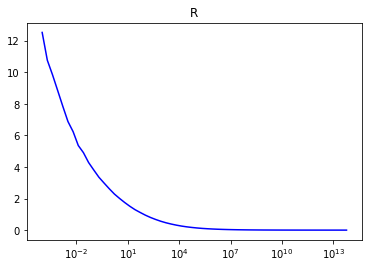

In [84]:
plt.figure()
plt.title("M")
plt.xscale('log')
plt.plot(po, m, 'g')
plt.show()

plt.figure()
plt.title("R")
plt.xscale('log')
plt.plot(po, (r), 'b')

#plt.legend(loc="lower left")
plt.show()
